<a href="https://colab.research.google.com/github/mithunmc/Image-Processing-Basics/blob/main/filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
!nvidia-smi

Wed Oct 20 08:16:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

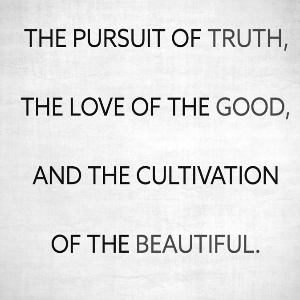

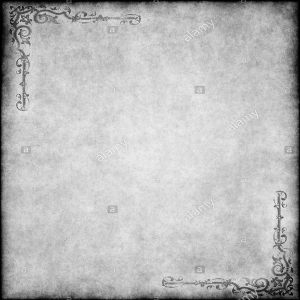

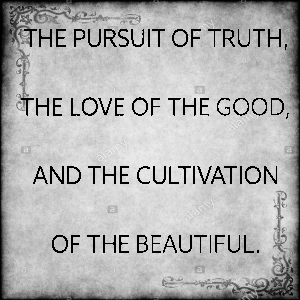

In [ ]:
#feature extraction
quote = cv.imread("quote.png")
white = cv.imread("white.png")
quote = cv.resize(quote, (300,300))
white = cv.resize(white, (300,300))
quote = cv.cvtColor(quote, cv.COLOR_BGR2GRAY)
white = cv.cvtColor(white, cv.COLOR_BGR2GRAY)

cv2_imshow(quote)
cv2_imshow(white)

th, im_th = cv.threshold(quote, 100, 255, cv.THRESH_BINARY)
count = 0
result = [0]*90000
for i in range (0,300):
  for j in range (0,300):
    if(im_th[i][j] == 0 ):
      result[count] = im_th[i][j]
      count  = count + 1
    else:
      result[count] = white[i][j]
      count  = count + 1
      
output = np.reshape(result,white.shape)
cv2_imshow(output)  


In [ ]:
flower = cv.imread("flower.jpeg")
flower = cv.resize(flower, (300,300))
f1 = flower.flatten()
hist,bins = np.histogram(flower.flatten(),256,[0,256])

filter = np.ones([3,3],  dtype=int)
filter = filter / 9

image_new = np.zeros([300,300])

for i in range(1,299):
  for j in range (1,299):
    temp = flower[i-1,j-1]*filter[0,0] + flower[i-1,j]*filter[0,1] + flower[i-1,j+1]*filter[0,2] + flower[i,j-1]*filter[1,0] + flower[i,j]*filter[1,1] + flower[i,j+1]*filter[1,2] + flower[i+1,j-1]*filter[2,0] + flower[i+1,j]*filter[2,1] + flower[i+1,j+1]*filter[2,2] 
    
    image_new[i,j] = temp
image_new = image_new.astype(np.uint8)

cv2_imshow(image_new)

# histogram equalisation
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())

cdf_m = num_cdf_m/den_cdf_m

cdf = np.ma.filled(cdf_m,0).astype('uint8')

image2 = cdf[f1]
plt.hist(image2,256,[0,256], color = 'r')
plt.show()
image3 = np.reshape(image2,flower.shape)

cv2_imshow(image3)

ValueError: ignored